In [28]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns

# Kmeans clustering

In [14]:
X = np.array([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14]])
Y = np.array([[7,8],[9,10],[11,12]])
D = distance.cdist(X,Y,'euclidean')
D, np.argmin(D,axis=1)

(array([[ 8.48528137, 11.3137085 , 14.14213562],
        [ 5.65685425,  8.48528137, 11.3137085 ],
        [ 2.82842712,  5.65685425,  8.48528137],
        [ 0.        ,  2.82842712,  5.65685425],
        [ 2.82842712,  0.        ,  2.82842712],
        [ 5.65685425,  2.82842712,  0.        ],
        [ 8.48528137,  5.65685425,  2.82842712]]),
 array([0, 0, 0, 0, 1, 2, 2], dtype=int64))

In [19]:
"""
init_centroid : create k random centroids from the dataset
assign_label: assign label for each data point base on the closet centroid
update_centroid: update the centroid by taking means
has_converged: check if the centtroid has converged
"""
def init_centroid(X,k):
    # randomly pick k row from X
    return X[np.random.choice((X.shape[0]),k)]
def assign_labels(X,centroids):
    #calculate pairwise distance between each point and each centroid
    D = distance.cdist(X,centroids,'euclidean')
    return np.argmin(D,axis=1)
def update_centroid(X,labels,k):
    centroids = np.zeros((k,X.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(X[labels == i],axis=0)
    return centroids
def has_converged(centroids,new_centroids):
    return (set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids]))

In [20]:
def kmeans(X,k):
    centroids = [init_centroid(X,k)]
    labels = []
    iteration = 0
    while True:
        labels.append(assign_labels(X,centroids[-1]))
        new_centroid = update_centroid(X,labels[-1],k)
        if has_converged(centroids[-1],new_centroid):
            break
        centroids.append(new_centroid)
        iteration += 1
    return (centroids,labels,iteration)

# Assignment 1

In [81]:
sigma = [[1,0],[0,1]]
X1 = np.random.multivariate_normal([2,2],sigma,200)
X2 = np.random.multivariate_normal([8,3],sigma,200)
X3 = np.random.multivariate_normal([3,6],sigma,200)
X = np.concatenate((X1,X2,X3),axis=0)
true_labels = np.array([0]*200+[1]*200+[2]*200)
(centroids,labels,iteration) = kmeans(X,3)
print(f'Centroids found by k-means:\n {centroids[-1]}')

Centroids found by k-means:
 [[2.00587194 1.99025494]
 [7.89895539 2.8750143 ]
 [2.96790883 5.92008299]]


In [92]:
def plot_kmeans(X,centroids,cluster_labels,true_labels):
    markers = ['o', 's', '^']     
    colors  = ['C0','C1','C2']    

    plt.figure(figsize=(10,6))
    for true_label in np.unique(true_labels):
        idx = np.where(true_labels == true_label)[0]
        # For those points, plot each cluster separately
        for cluster in np.unique(cluster_labels):
            sel = idx[cluster_labels[idx] == cluster]
            plt.scatter(
                X[sel,0], X[sel,1],
                marker=markers[true_label],
                color=colors[cluster],
                edgecolor='k',      # black edge to make shapes pop
                s=50,
                label=f"True {true_label}, Clust {cluster}"
            )

    # plot centroids
    plt.scatter(centroids[:,0], centroids[:,1],
                marker='X', c='red', s=200, label='Centroids')

    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize='small')
    plt.title("Data Points: marker=TRUE component, color=K-means cluster")
    plt.xlabel("x₁"); plt.ylabel("x₂")
    plt.tight_layout()
    plt.show()

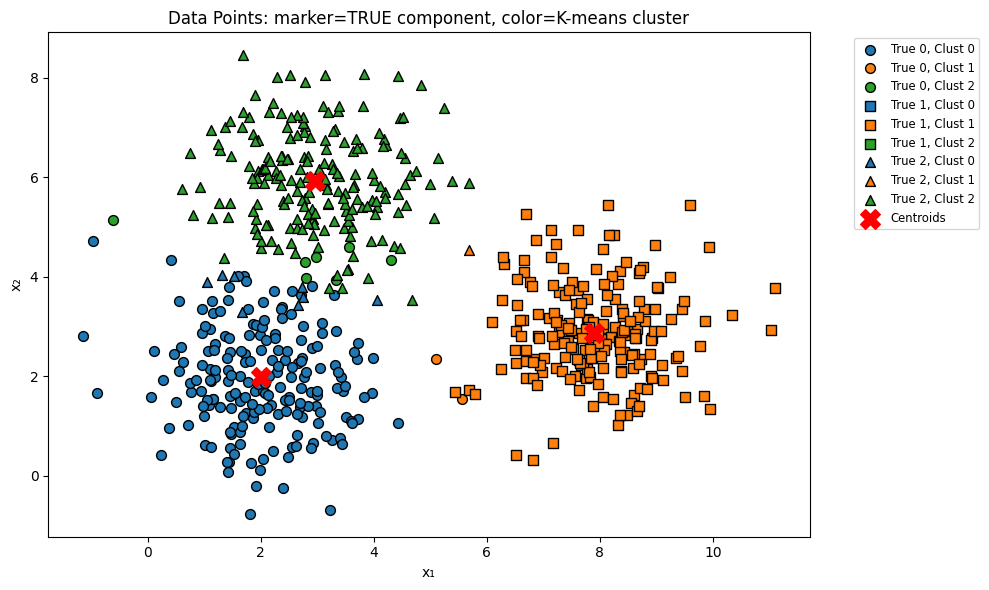

In [93]:
plot_kmeans(X,centroids[-1],labels[-1],true_labels)

K-means nhạy cảm với việc khởi tạo centroids ban đầu. Với việc chọn random centroids thì ở các lần chạy khác nhau, thì việc phân cụm sẽ có thể khác nhau. Tuy nhiên, ta có thể thấy rằng với phân bố của dữ liệu thì việc phân cụm khá dễ dàng. Các centroids sẽ gần với mean của phân phối ban đầu

# Assignment 2

In [95]:
sigma = [[1,0],[0,1]]
X1 = np.random.multivariate_normal([2,2],sigma,50)
X2 = np.random.multivariate_normal([8,3],sigma,20)
X3 = np.random.multivariate_normal([3,6],sigma,1000)
X = np.concatenate((X1,X2,X3),axis=0)
true_labels = np.array([0]*50 + [1]*20 + [2]*1000)
(centroids,labels,iteration) = kmeans(X,3)
print(f'Centroids found by k-means:\n {centroids[-1]}')

Centroids found by k-means:
 [[2.43018636 3.72576252]
 [4.44523403 5.60978081]
 [2.52682108 6.40838082]]


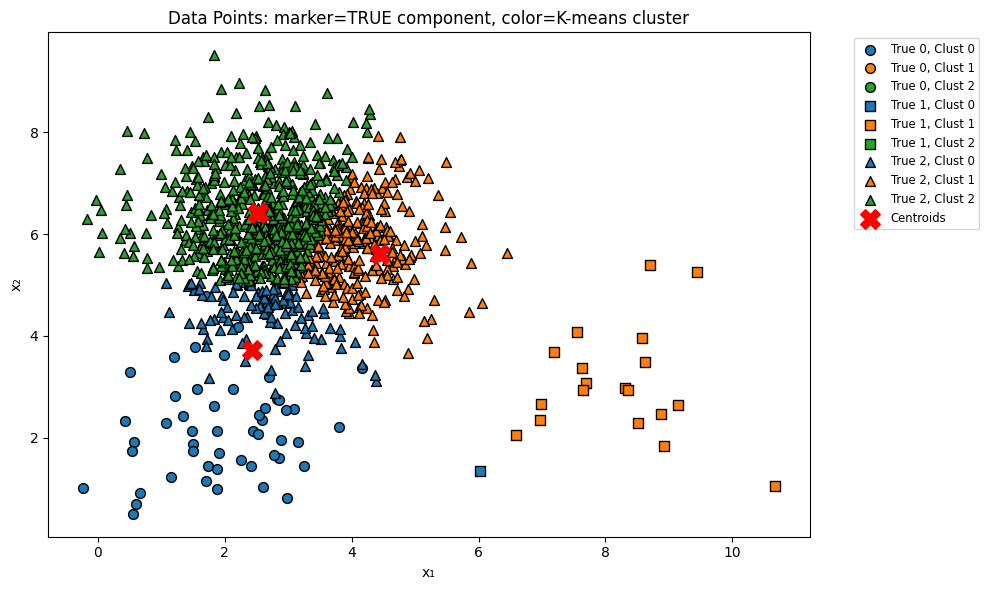

In [96]:
plot_kmeans(X,centroids[-1],labels[-1],true_labels)

Với sự chênh lệch lớn về số điểm dữ liệu thuộc các phân phối khác nhau, sẽ tạo ra các cluster với chênh lệch lượng điểm dữ liệu, có thể sẽ gây nhiễu. Các điểm centroids của các cụm sẽ gần nhau lại, tạo ra vùng phân nhóm không hợp lý

# Assignment 3

In [99]:
sigma1 = [[1,0],[0,1]]
sigma2 = [[10,0],[0,1]]
X1 = np.random.multivariate_normal([2,2],sigma1,200)
X2 = np.random.multivariate_normal([8,3],sigma1,200)
X3 = np.random.multivariate_normal([3,6],sigma2,200)
X = np.concatenate((X1,X2,X3),axis=0)
true_labels = np.array([0]*200+[1]*200+[2]*200)
(centroids,labels,iteration) = kmeans(X,3)
print(f'Centroids found by k-means:\n {centroids[-1]}')

Centroids found by k-means:
 [[1.92452388 6.17872776]
 [1.91097851 1.94236122]
 [7.96930514 3.65830925]]


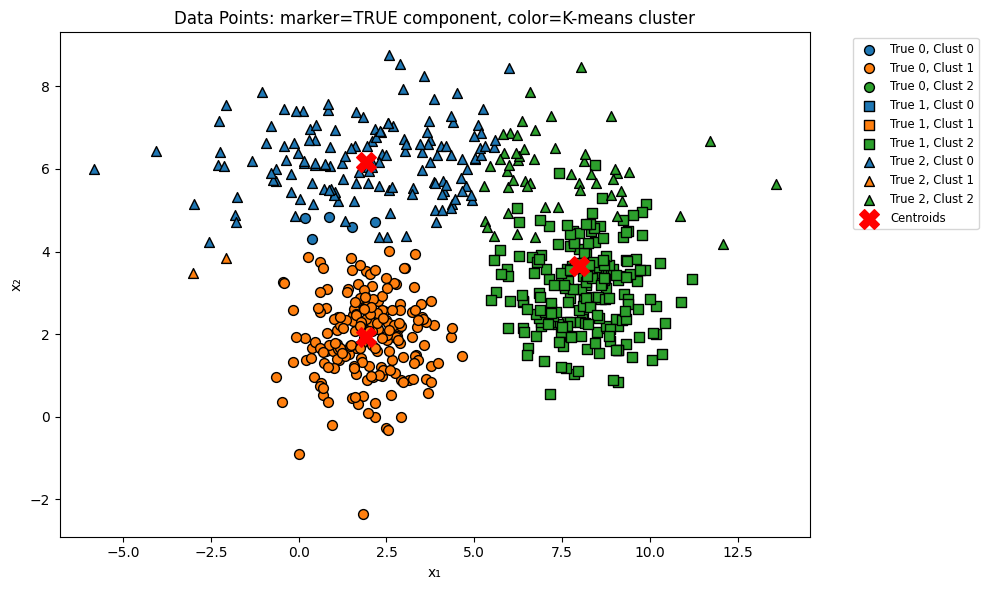

In [100]:
plot_kmeans(X,centroids[-1],labels[-1],true_labels)

Với  $\mathcal{N}((3, 6), \Sigma_2)$ thì ta có thể thấy dữ liệu khởi tạo từ phân phối này trải dài trên trục x1, 1 số điểm được phân vào nhóm khác. Với sự khác biệt trong phân phối, khiến kmeans khó bắt được vùng thật sự nếu t muốn số điểm tạo từ 1 phân phối thuộc 1 vùng phân cụm.